About this file
Training set for Credit Card Transactions

index - Unique Identifier for each row

transdatetrans_time - Transaction DateTime

cc_num - Credit Card Number of Customer

merchant - Merchant Name

category - Category of Merchant

amt - Amount of Transaction

first - First Name of Credit Card Holder

last - Last Name of Credit Card Holder

gender - Gender of Credit Card Holder

street - Street Address of Credit Card Holder

city - City of Credit Card Holder

state - State of Credit Card Holder

zip - Zip of Credit Card Holder

lat - Latitude Location of Credit Card Holder

long - Longitude Location of Credit Card Holder

city_pop - Credit Card Holder's City Population

job - Job of Credit Card Holder

dob - Date of Birth of Credit Card Holder

trans_num - Transaction Number

unix_time - UNIX Time of transaction

merch_lat - Latitude Location of Merchant

merch_long - Longitude Location of Merchant

is_fraud - Fraud Flag <--- Target Class

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Librerias para EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Cargar conjunto de datos
filename =('/content/drive/MyDrive/CODING DOJO/Códigos/Proyecto 2/fraudTrain.csv')
filename2=('/content/drive/MyDrive/CODING DOJO/Códigos/Proyecto 2/fraudTest.csv')
train = pd.read_csv(filename, sep=',')
test = pd.read_csv(filename, sep=',')

In [4]:
#Analizar la base de entrenamiento
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [5]:
train.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
train.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

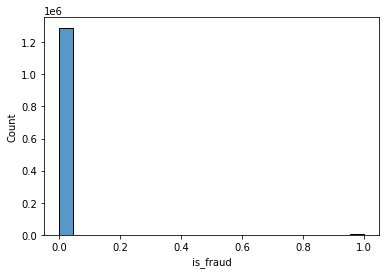

In [7]:
sns.histplot(train['is_fraud'])

In [8]:
#Analizar cuantos casos de fraude existe en la base de entrenamiento
print(train['is_fraud'].value_counts()/len(train))
print(train['is_fraud'].value_counts())

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64
0    1289169
1       7506
Name: is_fraud, dtype: int64


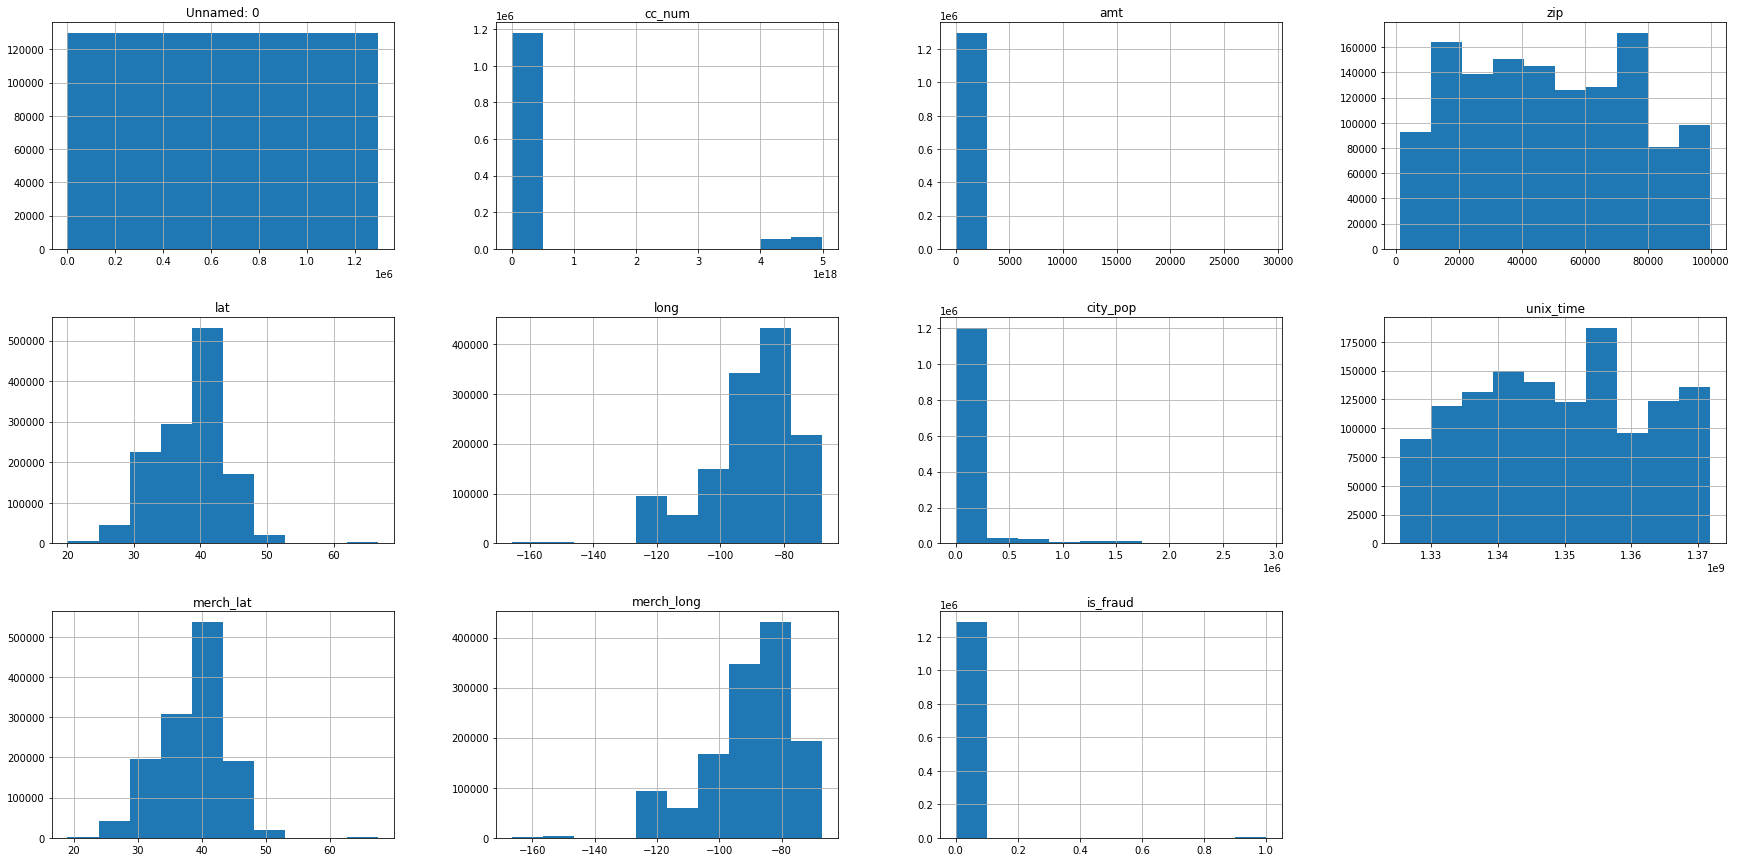

In [9]:
#Analizar variable numéricas
numerical = train.dtypes != object
num_cols = train.loc[:, numerical[numerical == True].keys()]
num_cols.hist(figsize = (30,15), layout = (3,4))
plt.show()

In [10]:
#eliminar columna Unnamed
train.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
train.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


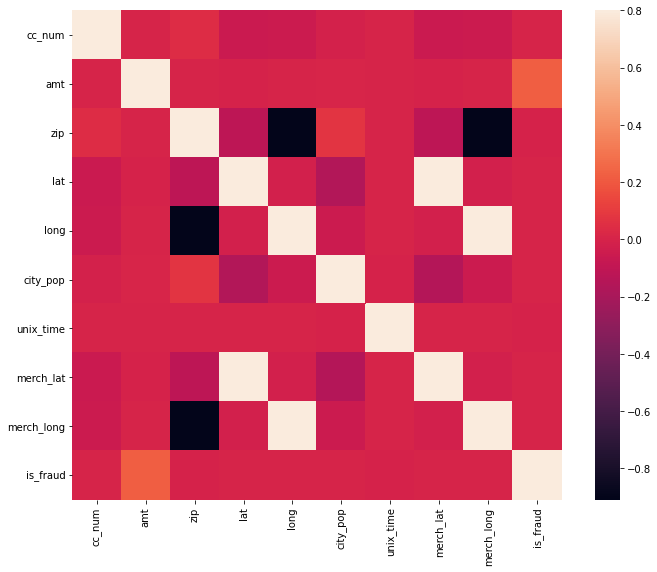

In [12]:
corrmat = train.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)

La variable que más correlación tiene respecto a si es fraude o no es el monto de la transacción.

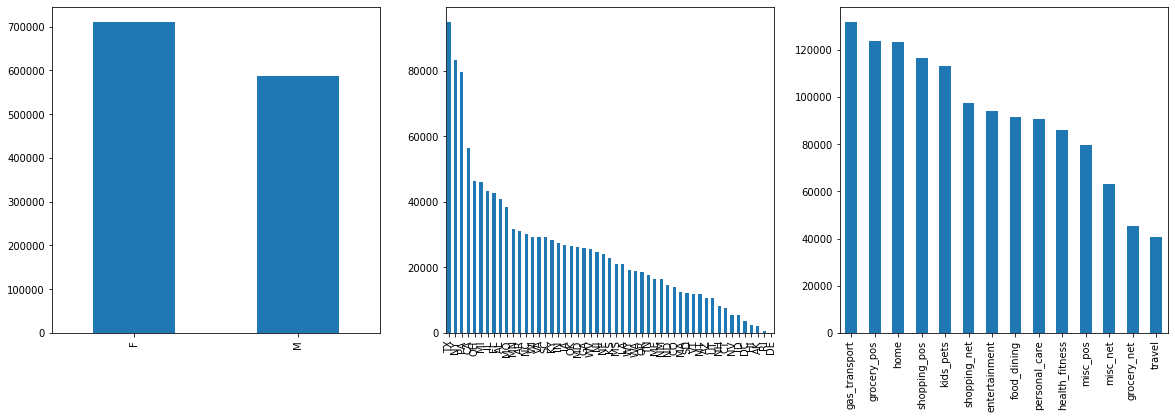

In [13]:
#Analizar variable categóricas 
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
train['gender'].value_counts().plot.bar();
plt.subplot(1,3,2)
train['state'].value_counts().plot.bar();
plt.subplot(1,3,3)
train['category'].value_counts().plot.bar();

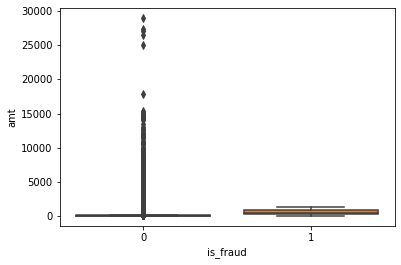

In [15]:
sns.boxplot(x='is_fraud',y='amt', data=train)

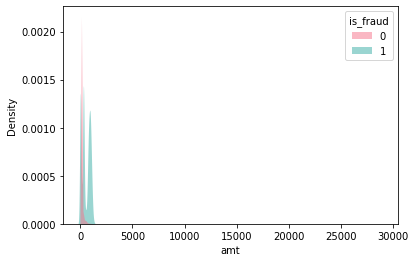

In [17]:
sns.kdeplot(
   data=train, x="amt", hue="is_fraud",
   fill=True, common_norm=False, palette="husl",
   alpha=.5, linewidth=0
)

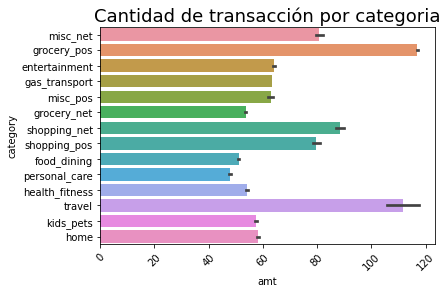

In [19]:
sns.barplot(y='category',x='amt',data=train) 
plt.xticks(rotation=45)
plt.title('Cantidad de transacción por categoria',fontsize=18);

In [25]:
#Código para transformar la columna que contiene fechas en datatime
train['trans_date_trans_time'] = pd.to_datetime(train['trans_date_trans_time'])
#Obtener la hora de la transacción
train['trans_hour'] = train['trans_date_trans_time'].dt.hour
#Obtener el día de la transacción
train['day'] = train['trans_date_trans_time'].dt.day_name()
#Obtener el mes de la transacción
train['month'] = train['trans_date_trans_time'].dt.to_period('M')

In [26]:
train.groupby(['month','day'])['amt'].sum().unstack()

day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
2019-01,398342.57,696851.52,401561.07,575791.22,438500.32,842453.52,406249.81
2019-02,407576.78,692221.38,406160.96,575004.41,513225.07,674438.49,336035.14
2019-03,678094.62,879135.01,941626.58,1089343.71,535615.13,434964.78,469106.57
2019-04,547174.77,1051992.38,764425.21,863378.01,528548.96,519781.61,486203.64
2019-05,682109.19,922441.46,773928.15,922868.88,693634.46,447227.11,618694.07
2019-06,692038.69,1084410.86,1188398.53,1372820.74,624709.18,510114.76,563904.66
2019-07,646571.22,1328726.40,932584.12,1121351.26,673522.37,634027.95,707243.42
2019-08,828168.62,1082355.16,1165042.42,1105472.22,788357.10,505984.32,571908.81
2019-09,531398.20,1081122.62,774248.15,1144036.59,503653.78,420987.13,494387.95


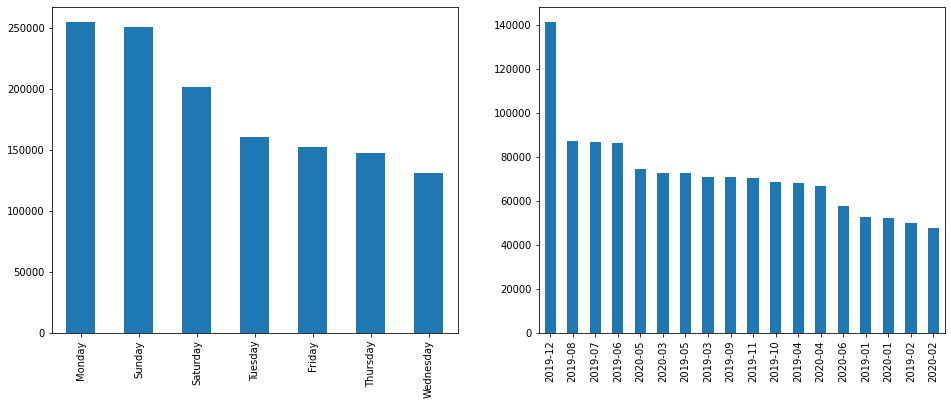

In [29]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
train['day'].value_counts().plot.bar();
plt.subplot(1,2,2)
train['month'].value_counts().plot.bar();

Lunes y domingo son los días donde se hace mayor cantidad de transacciones. Diciembre del 2019 igual fue el mes que mayor cantidad de transacciones tuvo. 

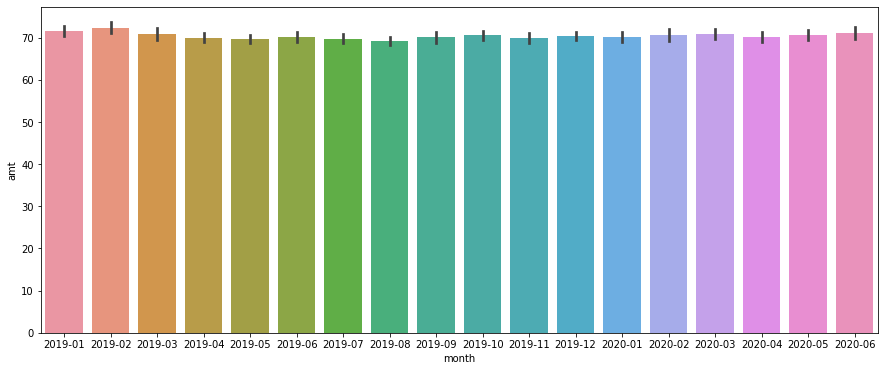

In [32]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'month', y = 'amt', data = train)